In [219]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

In [257]:
df_co2 = pd.read_csv("data/pilot_1/VTE_C02_levels_pilot_1.csv", parse_dates=['Timestamp'])
df_filter = pd.read_csv("data/pilot_1/VTE_air_filter_use_pilot_1.csv", parse_dates=['Timestamp'])


In [264]:
df_co2['date'] = df_co2['Timestamp'].dt.strftime('%d/%m/%Y')
df_co2 = df_co2[df_co2['date'] != '27/08/2021']

df_co2.columns = ['Timestamp', 'Turno',
       'Grado', 'Grupo',
       'Recreo',
       'CO2_ppm', 'date']

df_co2 = df_co2[df_co2['Grado'] != 'Otro']


In [265]:
grade_list = df_co2['Grado'].value_counts().index.sort_values().to_list()
younger_grades = grade_list[:int(len(grade_list)/2)]

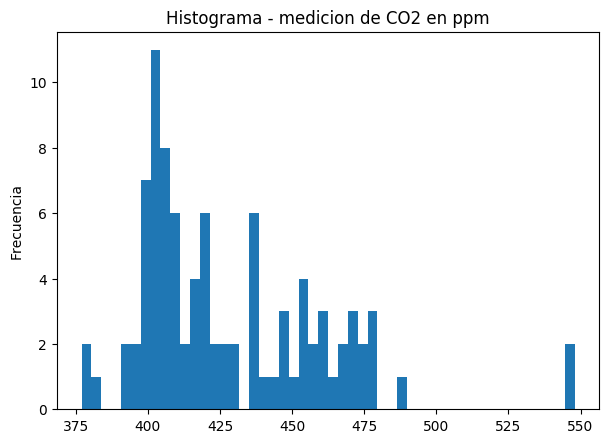

In [266]:
plt.hist(df_co2['CO2_ppm'], bins=50)
plt.gca().set(title='Histograma - medicion de CO2 en ppm', ylabel='Frecuencia');

In [268]:
x1 = df_co2[df_co2['Grado'].isin(younger_grades)][u'CO2_ppm']
x2 = df_co2[~df_co2['Grado'].isin(younger_grades)][u'CO2_ppm']
kwargs = dict(alpha=0.5, bins=100)


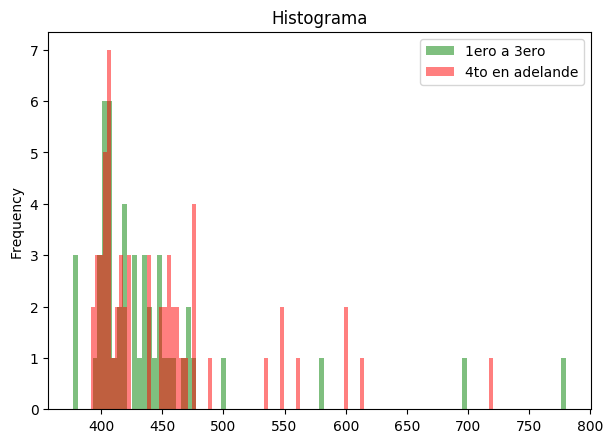

In [224]:
plt.hist(x1, **kwargs, color='g', label='1ero a 3ero')
plt.hist(x2, **kwargs, color='r', label='4to en adelande')
plt.gca().set(title='Histograma', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();

In [278]:
y1 = df_co2[df_co2['Recreo'] == 'Primera medición: después del ingreso y antes del recreo'][u'CO2_ppm']
y2 = df_co2[df_co2['Recreo'] == 'Segunda medición: después del recreo y antes de la salida de clases'][u'CO2_ppm']
kwargs = dict(alpha=0.5, bins=100)

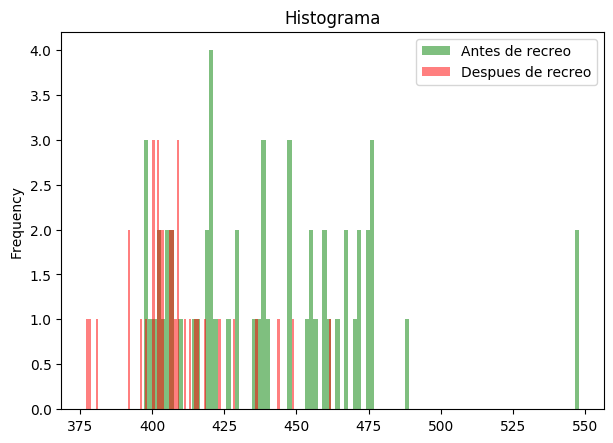

In [279]:
plt.hist(y1, **kwargs, color='g', label='Antes de recreo')
plt.hist(y2, **kwargs, color='r', label='Despues de recreo')
plt.gca().set(title='Histograma', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();

In [189]:
df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'].value_counts()

6                                   29
7                                   25
5                                   18
4                                   17
8                                   13
3                                   12
15                                  11
9                                    8
10                                   7
11                                   2
3 personas                           1
4 personas                           1
2                                    1
9 personas                           1
4 personal de la UDEI                1
1                                    1
Somos 4 personal de la UDEEI-150     1
3 personal UDEEI                     1
Seis                                 1
Name: ¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?, dtype: int64

In [205]:
df_filter = df_filter[df_filter['Grado escolar (Aula de cómputo u oficinas marcar "otro")'] != 'Otro']
df_filter = df_filter[df_filter['Turno']=='Matutino']
df_filter['date'] = df_filter['Timestamp'].dt.strftime('%d/%m/%Y')
df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'] = df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'].str.replace('Seis', '6').str.replace('personas', '').str.strip(" ").str.replace(' personal de la UDEEI-150', '').str.replace('Somos ', '')

df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'] = df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'].astype(int)

In [206]:
df_filter.groupby(['date','Grado escolar (Aula de cómputo u oficinas marcar "otro")'])['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'].sum()

date        Grado escolar (Aula de cómputo u oficinas marcar "otro")
09/01/2021  1ero                                                        11
            2do                                                         12
            3ero                                                        17
            4to                                                         12
            5to                                                         11
            6to                                                         16
09/02/2021  1ero                                                        11
            2do                                                         12
            3ero                                                         9
            4to                                                         14
            5to                                                         15
            6to                                                         11
09/06/2021  1ero               

In [167]:
df_filter['¿Se reportó HOY algún nuevo caso de Covid en alguna persona que haya usado este salón de clase (personal docente o alumnos)?']

KeyError: '¿Se reportó HOY algún nuevo caso de Covid en alguna persona que haya usado este salón de clase (personal docente o alumnos)?'

In [179]:
df_filter[df_filter.columns[4]].value_counts()

No         102
No sabe     18
Name:  ¿Se reportó HOY algún nuevo caso de Covid en alguna persona que haya usado este salón de clase  (personal docente o alumnos)?, dtype: int64

In [172]:
df_filter.columns

Index(['Timestamp', 'Grado escolar (Aula de cómputo u oficinas marcar "otro")',
       'Grupo',
       '¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?',
       ' ¿Se reportó HOY algún nuevo caso de Covid en alguna persona que haya usado este salón de clase  (personal docente o alumnos)?',
       '¿Cuál de las siguientes opciones describe mejor el uso del cubre bocas en este salón de clase?',
       '¿Cuál de las siguientes opciones describe mejor el uso del purificador el día de hoy?',
       '¿Cuál es la razón por la que no fue usado o estuvo apagado temporalmente el purificador?',
       '¿Cuál de las siguientes opciones describe mejor la situación de las ventanas de este salón de clase?',
       '¿Por qué razón se decidió cerrar o mantener cerradas las ventanas durante la jornada escolar de hoy?',
       '¿Cuál de las siguientes opciones describe mejor la situación de la puerta principal de este salón de clase?',
       '¿Por qué razón se decidió c

In [208]:
df_filter.date.value_counts().sort_index()

09/01/2021    12
09/02/2021    12
09/06/2021    12
09/07/2021    11
09/08/2021     9
09/09/2021     7
09/10/2021     3
13/09/2021    12
14/09/2021    11
30/08/2021    14
31/08/2021    12
Name: date, dtype: int64

In [209]:
url_1 = "https://docs.google.com/spreadsheets/d/15RiJu-vsM61rgmHGJV1BQaT2m6nBX_Y4Vc1N82rdLs4/edit?resourcekey#gid=1880725359"

In [214]:
df = pd.read_csv(url_1)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [218]:
df_co2

,Timestamp,Turno,"Grado escolar (Aula de cómputo u oficinas marcar ""otro"")",Grupo,¿Qué medición está reportando?,¿Cuál es el nivel de CO2 a reportar?
0,8/27/2021 13:32:54,NaN,1ero,A,Primera medición: después del ingreso y antes ...,580
1,8/27/2021 13:33:11,NaN,5to,A,Primera medición: después del ingreso y antes ...,615
2,8/27/2021 13:33:15,NaN,4to,A,Primera medición: después del ingreso y antes ...,720
3,8/27/2021 13:33:16,NaN,2do,B,Primera medición: después del ingreso y antes ...,698
4,8/27/2021 13:33:23,NaN,1ero,B,Primera medición: después del ingreso y antes ...,455
5,8/27/2021 13:33:23,NaN,Otro,No aplica,Primera medición: después del ingreso y antes ...,600
6,8/27/2021 13:33:25,NaN,6to,B,Primera medición: después del ingreso y antes ...,560
7,8/27/2021 13:33:27,NaN,4to,B,Primera medición: después del ingreso y antes ...,600
8,8/27/2021 13:33:30,NaN,1ero,A,Segunda medición: después del recreo y antes d...,780
9,8/27/2021 13:33:39,NaN,3ero,B,Primera medición: después del ingreso y antes ...,500


In [273]:
df_co2.Recreo.str.startswith('Segunda medición')

12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29       NaN
30     False
31     False
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
       ...  
77      True
78      True
79      True
80      True
81      True
82      True
85      True
86      True
87      True
88      True
89      True
90      True
91      True
92      True
93      True
94      True
95      True
96      True
97     False
98     False
99     False
100    False
101    False
102    False
103    False
104    False
105    False
106    False
107    False
108    False
Name: Recreo, Length: 92, dtype: object

In [270]:
df_co2.Recreo.str.startswith('Primera medición').value_counts()

True     55
False    36
Name: Recreo, dtype: int64

In [276]:
df_co2[df_co2['Recreo'].str.startswith('Primera medición')]

ValueError: cannot index with vector containing NA / NaN values

In [277]:
df_co2.Recreo.value_counts()

Primera medición: después del ingreso y antes del recreo               55
Segunda medición: después del recreo y antes de la salida de clases    36
Name: Recreo, dtype: int64